### Business objective
Developing a customer churn prediction model that enables a telecommunication company to proactively identify at-risk customers and enhance retention strategies .

### Data explaination

**Demographics**

CustomerID: A unique ID that identifies each customer.

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Gender: The customer’s gender: Male, Female

Age: The customer’s current age, in years, at the time the fiscal quarter ended.

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Partner: Indicates if the customer has partner: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
 

**Location**

Country: The country of the customer’s primary residence.

State: The state of the customer’s primary residence.

City: The city of the customer’s primary residence.

Zip Code: The zip code of the customer’s primary residence.

Lat Long: The combined latitude and longitude of the customer’s primary residence.

Latitude: The latitude of the customer’s primary residence.

Longitude: The longitude of the customer’s primary residence.

**Services**

CustomerID: A unique ID that identifies each customer.

Tenure in Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Music: Indicates if the customer uses their Internet service to stream music from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
 
**Status**

Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.


In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing

### Reading and inspecting data

In [3]:
df = pd.read_excel('Telco_customer_churn.xlsx')

In [4]:
df.head(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

**Churn rate**

In [6]:
df['Churn Label'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn Label, dtype: float64

We have 26.5% churned customers

In [7]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce').fillna(0)

### EDA

**Function to visualize churn categories and churn reasons**

In [8]:
def plot_count_and_percentage(df, feature):
    counts = df[feature].value_counts()
    percentages = 100 * df[feature].value_counts(normalize=True)
    
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    sns.barplot(x=counts.index, y=counts.values, ax=ax[0])
    ax[0].set_title('Counts')
    ax[0].set_xlabel(feature)
    ax[0].set_ylabel('Count')
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

    sns.barplot(x=percentages.index, y=percentages.values, ax=ax[1])
    ax[1].set_title('Percentages')
    ax[1].set_xlabel(feature)
    ax[1].set_ylabel('Percentage %')
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

**Churn Reasons**

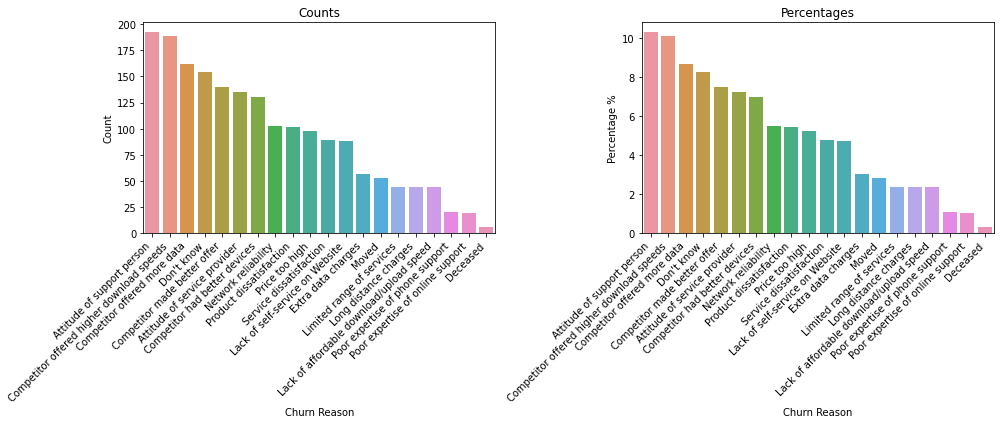

In [9]:
plot_count_and_percentage(df , 'Churn Reason')

**Visualize the relationship between categorial features and Churn Label**

In [10]:
Categorial_features = list(df.drop(['CustomerID', 'Country', 'State', 'City', 'Lat Long','Churn Label',
                                    'Churn Reason'] ,axis=1).select_dtypes(include='object').columns)
Categorial_features

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [11]:
def visualize_categorial_features(df, features, hue):
    num_features = len(features)
    cols = 3 
    rows = (num_features + cols - 1) // cols 
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*5), constrained_layout=True)
    
    axes = axes.flatten()
    
    for i, feature in enumerate(features):
        sns.countplot(x=feature, data=df, hue=hue, ax=axes[i])
        axes[i].set_title(f'Count Plot of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')
        
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

    for j in range(len(features),len(axes)):
        axes[j].set_visible(False)
        
    plt.show()

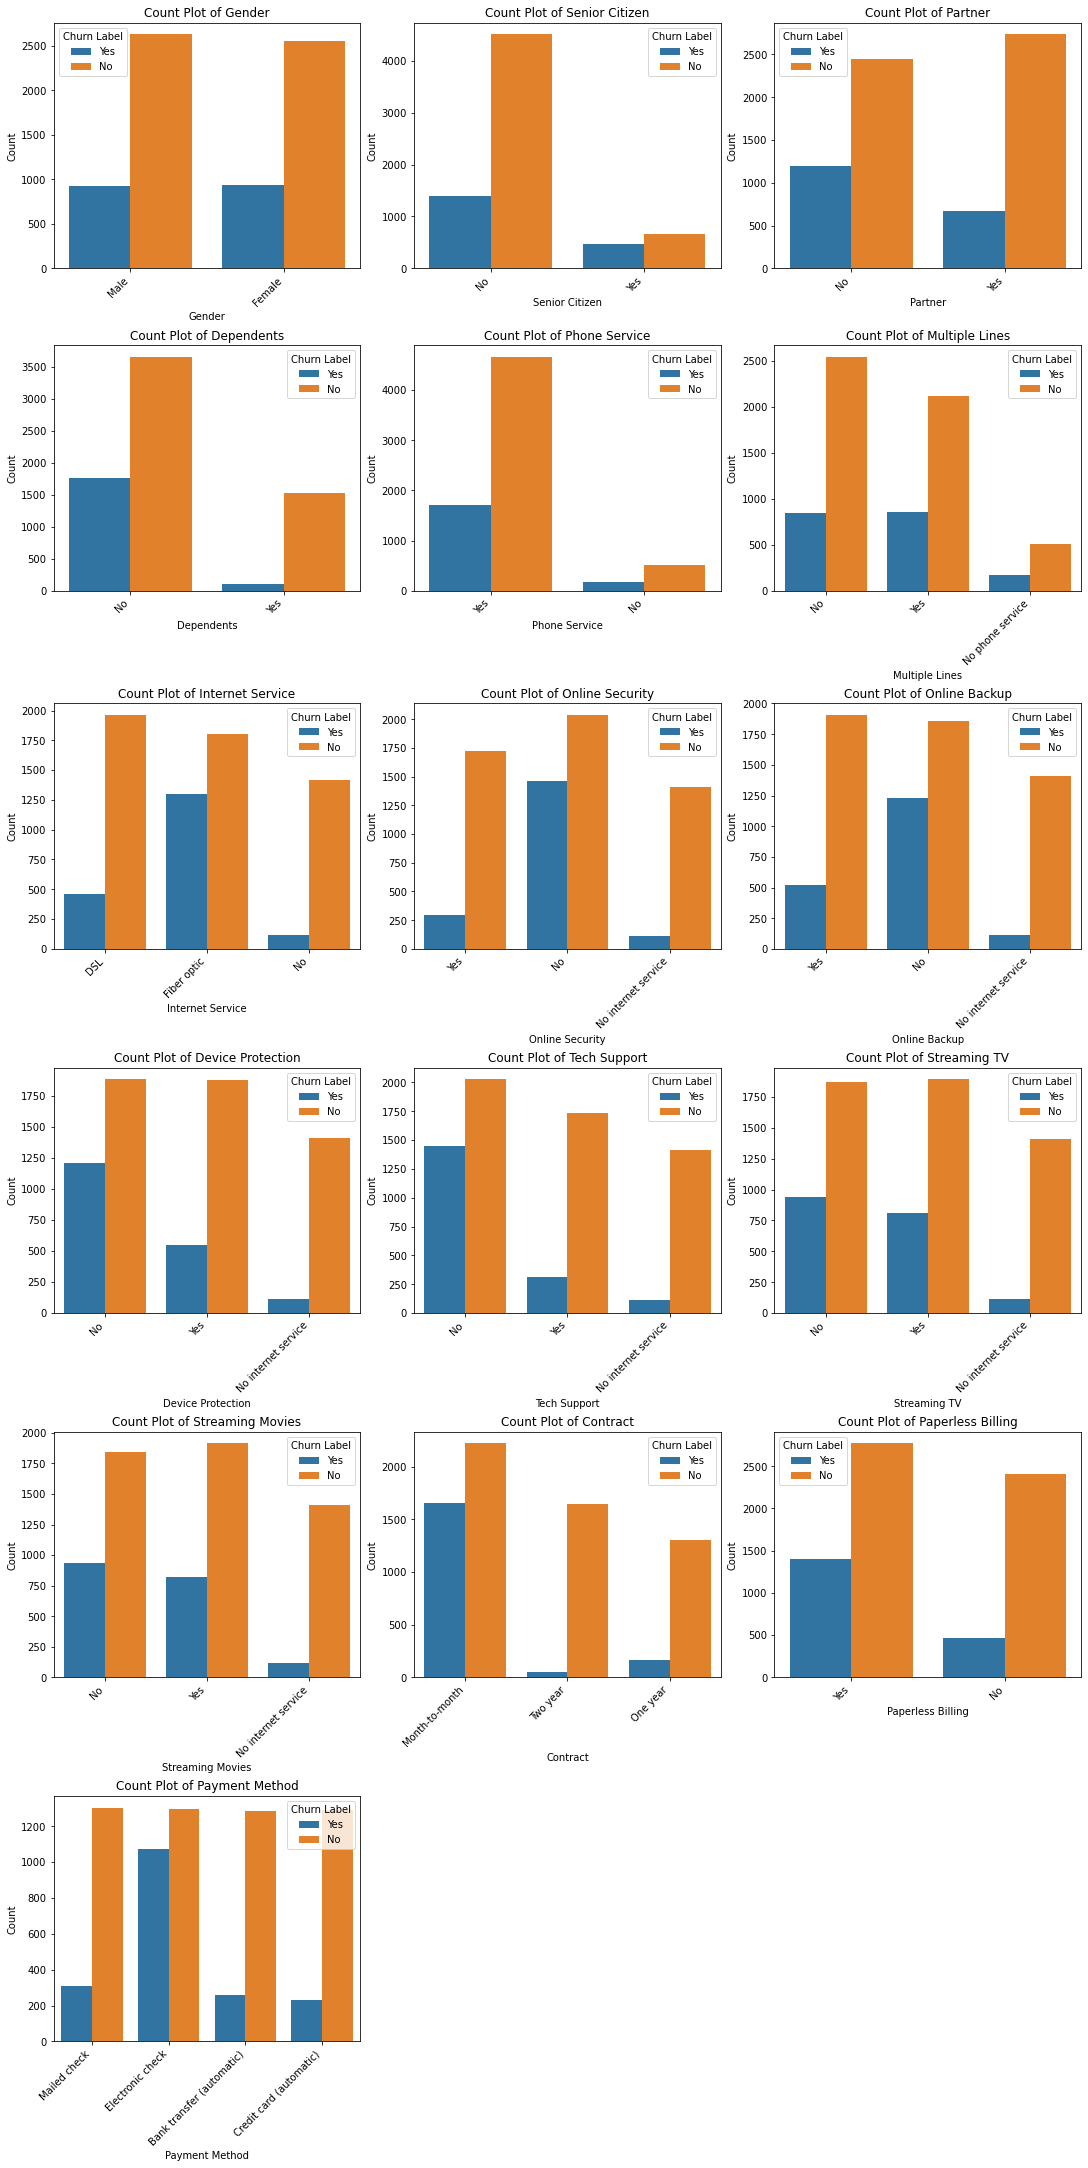

In [12]:
visualize_categorial_features(df , Categorial_features , 'Churn Label')

**Critical categorial features**
* Senior citizen
* Partner
* Dependents
* Internet service
* Internet type
* Online security
* Backup
* Device protection plan
* Premium Tech Support
* Contract
* Paperless billing
* Payment method

**Visualize the relationship between numerical features and Churn Label**

In [13]:
numerical_features = df.select_dtypes(include="number")
numerical_features

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,1,90003,33.964131,-118.272783,2,53.85,108.15,1,86,3239
1,1,90005,34.059281,-118.307420,2,70.70,151.65,1,67,2701
2,1,90006,34.048013,-118.293953,8,99.65,820.50,1,86,5372
3,1,90010,34.062125,-118.315709,28,104.80,3046.05,1,84,5003
4,1,90015,34.039224,-118.266293,49,103.70,5036.30,1,89,5340
...,...,...,...,...,...,...,...,...,...,...
7038,1,92285,34.341737,-116.539416,72,21.15,1419.40,0,45,5306
7039,1,92301,34.667815,-117.536183,24,84.80,1990.50,0,59,2140
7040,1,92304,34.559882,-115.637164,72,103.20,7362.90,0,71,5560
7041,1,92305,34.167800,-116.864330,11,29.60,346.45,0,59,2793


In [14]:
numerical_features.drop(['Zip Code','Latitude','Longitude','Count','Churn Value'] , axis=1,inplace = True)

In [15]:
def visualize_numerical_features(df, numerical_features):
    num_features = len(numerical_features)
    num_rows = (num_features + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))
    
    axes = axes.flatten()
    
    for i, feature in enumerate(numerical_features):
        sns.boxplot(x=df['Churn Label'], y=feature, data=df, ax=axes[i])
        axes[i].set_title(f'{feature} vs Churn Label')
        
    for j in range(len(numerical_features),len(axes)):
        axes[j].set_visible(False)
    
   
    plt.tight_layout()
    plt.show()

In [16]:
numerical_columns = list(numerical_features.columns)
numerical_columns

['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']

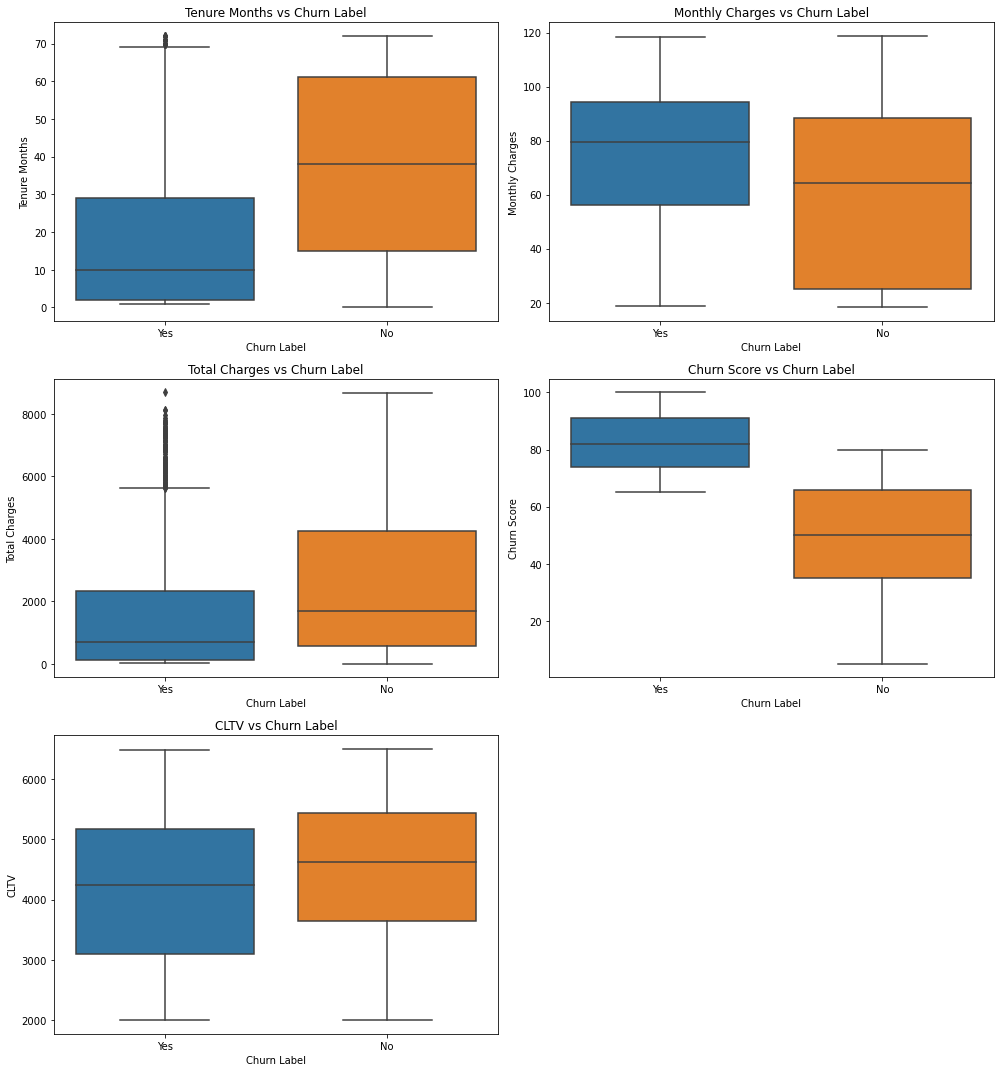

In [17]:
visualize_numerical_features(df , numerical_columns)

**Critical numerical features**
* Tenure in months
* Total Charges
* Churn score

### Features selection and engineering

**Feature selection based on exploratory data analysis**

In [18]:
selected_features = ['Senior Citizen', 'Partner', 'Dependents', 'Internet Service', 'Online Security', 'Online Backup', 
                     'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract',  'Paperless Billing',
                     'Payment Method','Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']
df[selected_features]

,Senior Citizen,Partner,Dependents,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV
0,No,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,2,53.85,108.15,86,3239
1,No,No,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,2,70.70,151.65,67,2701
2,No,No,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,8,99.65,820.50,86,5372
3,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,28,104.80,3046.05,84,5003
4,No,No,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),49,103.70,5036.30,89,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),72,21.15,1419.40,45,5306
7039,No,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,24,84.80,1990.50,59,2140
7040,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),72,103.20,7362.90,71,5560
7041,No,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,11,29.60,346.45,59,2793


**One-Hot encoding**

In [19]:
X = pd.get_dummies(df[selected_features])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Tenure Months                             7043 non-null   int64  
 1   Monthly Charges                           7043 non-null   float64
 2   Total Charges                             7043 non-null   float64
 3   Churn Score                               7043 non-null   int64  
 4   CLTV                                      7043 non-null   int64  
 5   Senior Citizen_No                         7043 non-null   uint8  
 6   Senior Citizen_Yes                        7043 non-null   uint8  
 7   Partner_No                                7043 non-null   uint8  
 8   Partner_Yes                               7043 non-null   uint8  
 9   Dependents_No                             7043 non-null   uint8  
 10  Dependents_Yes                      

**Encoding the target**

In [20]:
Y = df['Churn Label'].replace({'Yes':1,'No':0})
Y

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Label, Length: 7043, dtype: int64

**Train-Test split**

In [21]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=.2 , stratify=Y,random_state=23)

### Logistic Regression model

Mathematically, logistic regression models the probability P(Y=1∣X) of an event occurring as a function of predictor variables 𝑋 .

$$
P(Y=1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n)}}
$$

P(Y=1∣X): This denotes the probability of 𝑌 being 1 given the values of X. Essentially, it is the model’s estimate of how likely 𝑌 is to be 1 based on the values of the predictors X .

The term inside the exponent $ \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n $ is called the logit or log-odds, which is transformed into a probability using the sigmoid function. The model outputs the probability that Y=1 given X, which can be used to classify whether an observation belongs to class 1 or class 0.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr_model = LogisticRegression()
lr_params = {
    'solver' : ['liblinear' , 'saga'],
    'C' : [.01 , .1 , 1 , 10 , 100],
    'penalty' : ['l1', 'l2'],
}
grid_lr_model = GridSearchCV(estimator = lr_model , param_grid = lr_params , cv=3 , scoring = 'accuracy')
grid_lr_model.fit(x_train , y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [23]:
best_LR = grid_lr_model.best_estimator_
best_LR

LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [69]:
y_train_pred = best_LR.predict(x_train)
y_test_pred = best_LR.predict(x_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.922080,0.924060
precision,0.854839,0.856000
recall,0.850836,0.858289
f1,0.852833,0.857143


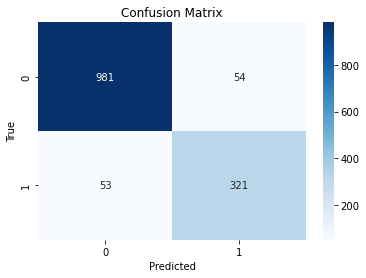

In [26]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [70]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test , y_test_pred)

0.9030574285049989

### DecisionTree model

 It works by recursively splitting the data into subsets based on the values of input features, creating a tree-like structure of decisions.
 
`Structure of a Decision Tree`

1 .`Nodes` :

* Root Node: The topmost node that represents the entire dataset. It is split into child nodes based on a feature that best separates the data.
* Decision Nodes: Internal nodes where the data is split based on feature values.
* Leaf Nodes: Terminal nodes that provide the final output or prediction. 

2 . `Edges` : The branches connecting nodes, representing the outcome of a decision (i.e., a specific feature value).

The decision tree algorithm splits the dataset at each node based on the value of a feature that maximizes a criterion such as  Gini impurity or entropy . This process continues recursively.
The recursive splitting stops when a node reaches a predefined maximum depth , a node has fewer than a minimum number of samples or the data in the node is perfectly classified or predicts a single continuous value.

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt_model = DecisionTreeClassifier()
dt_params = {
    'criterion' : ['entropy' , 'gini'],
    'max_depth' : [5 , 8, 10, 12],
}
grid_dt_model = GridSearchCV(estimator = dt_model , param_grid = dt_params , scoring = 'accuracy')

In [29]:
grid_dt_model.fit(x_train , y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 8, 10, 12]},
             scoring='accuracy')

In [30]:
best_DT = grid_dt_model.best_estimator_
best_DT

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [71]:
y_train_pred = best_DT.predict(x_train)
y_test_pred = best_DT.predict(x_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.940717,0.926189
precision,0.881156,0.855263
recall,0.897659,0.868984
f1,0.889331,0.862069


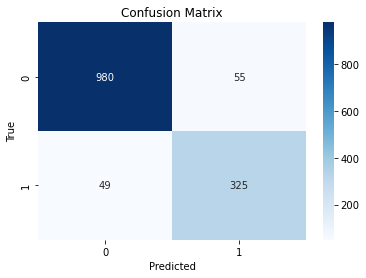

In [32]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [72]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test , y_test_pred)

0.907921930300447

### Using ensemble methods

Ensemble methods are a set of techniques in machine learning that combine the predictions of multiple models to improve overall performance and robustness. The main idea is that by aggregating the outputs of several models, the ensemble can often achieve better predictive accuracy and generalization than any individual model alone.

`Types of Ensemble Methods`

1 . `Bagging (Bootstrap Aggregating)` : training multiple instances of the same model on different subsets of the training data, which are created by sampling with replacement. The final prediction is typically made by averaging the predictions for regression or taking a majority vote for classification.

**Random Forest** is a popular bagging method where multiple decision trees are trained on different bootstrap samples, and their predictions are aggregated.

2 . `Boosting` :  sequentially training models, where each new model focuses on correcting the errors of the previous ones. The final prediction is a weighted average of the predictions from all models.

3 . `Stacking` : combines multiple models (base learners) by training a meta-model to learn how to best combine their predictions. Base learners are trained on the training data, and their predictions are used as input features for the meta-model .

A common stacking approach might involve training several different types of models (e.g., decision trees, support vector machines, and neural networks) and then using a logistic regression model to combine their outputs.

4 . `Voting` : combines predictions from multiple models by aggregating their outputs. 
Example: Using a mix of models like logistic regression, decision trees, and k-nearest neighbors, and aggregating their predictions.

### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"]}

In [35]:
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier()
grid_rf_model = GridSearchCV(estimator=rf_model, param_grid=param_grid,scoring='accuracy')
grid_rf_model.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

In [36]:
grid_rf_model.best_score_

0.9325529825800117

In [37]:
grid_rf_model.best_estimator_

RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=37)

In [65]:
best_RF = grid_rf_model.best_estimator_
y_train_pred = best_RF.predict(x_train)
y_test_pred = best_RF.predict(x_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.937167,0.929028
precision,0.909548,0.912651
recall,0.847492,0.810160
f1,0.877424,0.858357


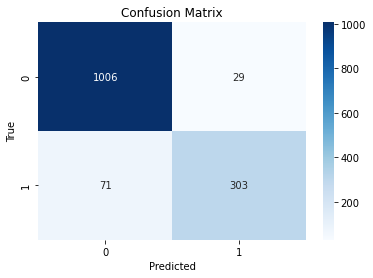

In [39]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [66]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test , y_test_pred)

0.8910705520679945

### XGboost model

In [40]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_params = {
        'n_estimators':[100 , 125 , 150 , 175],          
        'learning_rate':[0.01,.1,.2],         
        'max_depth':[3,5,7]
    }                  
xgb_model_grid = GridSearchCV(xgb_model , xgb_params , cv=3 , scoring = 'accuracy')
xgb_model_grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...e,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                

In [41]:
best_XGB = xgb_model_grid.best_estimator_
best_XGB

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [55]:
y_train_pred = best_XGB.predict(x_train)
y_test_pred = best_XGB.predict(x_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.933617,0.933286
precision,0.859065,0.862694
recall,0.896990,0.890374
f1,0.877618,0.876316


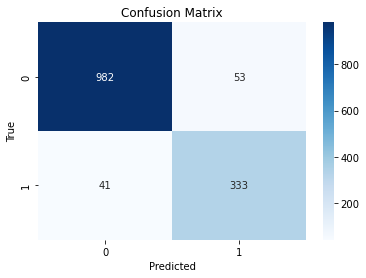

In [56]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [57]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test , y_test_pred)

0.9195833010411014

### Stacking

In [44]:
from sklearn.ensemble import StackingClassifier
base_models = [
    ('rf' , best_RF),
    ('xgb' , best_XGB)
]
meta_model = best_LR

stacking_model = StackingClassifier(estimators = base_models , final_estimator = meta_model , cv = 3)
stacking_model.fit(x_train , y_train)

StackingClassifier(cv=3,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=7,
                                                       max_features='log2',
                                                       n_estimators=37)),
                               ('xgb',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=0,
                                              gpu_id=-1,
                                              grow_policy='dept

In [58]:
y_train_pred = stacking_model.predict(x_train)
y_test_pred = stacking_model.predict(x_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.936280,0.933996
precision,0.872703,0.872679
recall,0.889632,0.879679
f1,0.881086,0.876165


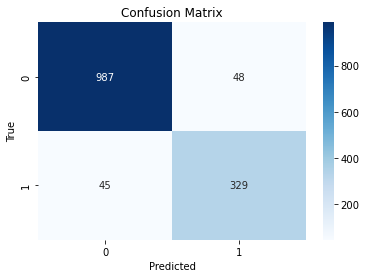

In [46]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [59]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test , y_test_pred)

0.9166511663954119

### Voting

In [47]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

models = [
    ('rf' , best_RF),
    ('xgb' , best_XGB),
    ('lr' , best_LR),
    ('svm' , SVC(probability=True) )
]

hard_voting_classifier = VotingClassifier(estimators = models , voting = 'hard')
hard_voting_classifier.fit(x_train , y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=7,
                                                     max_features='log2',
                                                     n_estimators=37)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            impor...
                                            learning_rate=0.01, max_bin=256,
     

In [60]:
y_train_pred = hard_voting_classifier.predict(x_train)
y_test_pred = hard_voting_classifier.predict(x_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.925808,0.926899
precision,0.914550,0.932907
recall,0.794649,0.780749
f1,0.850394,0.850073


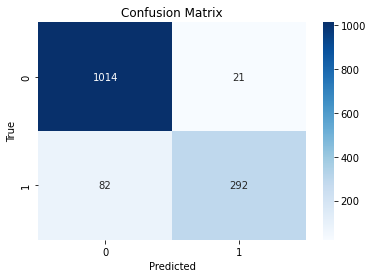

In [49]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [61]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test , y_test_pred)

0.8802294040145703

In [50]:
soft_voting_classifier = VotingClassifier(estimators = models , voting = 'soft')
soft_voting_classifier.fit(x_train , y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=7,
                                                     max_features='log2',
                                                     n_estimators=37)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            impor...
                                            learning_rate=0.01, max_bin=256,
     

In [62]:
y_train_pred = soft_voting_classifier.predict(x_train)
y_test_pred = soft_voting_classifier.predict(x_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.931310,0.929737
precision,0.879973,0.876712
recall,0.858194,0.855615
f1,0.868947,0.866035


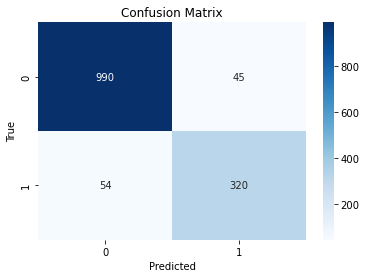

In [52]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [63]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test , y_test_pred)

0.9060683561962334